<a href="https://colab.research.google.com/github/Mostafa-Mohamed-Atef/movies-data-science/blob/main/movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing

In [271]:
import pandas as pd
data = pd.read_csv('movies.csv')

In [272]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1794 entries, 0 to 1793
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            1794 non-null   int64  
 1   imdb            1794 non-null   object 
 2   title           1794 non-null   object 
 3   test            1794 non-null   object 
 4   clean_test      1794 non-null   object 
 5   binary          1794 non-null   object 
 6   budget          1794 non-null   object 
 7   domgross        1777 non-null   object 
 8   intgross        1783 non-null   float64
 9   code            1794 non-null   object 
 10  budget_2013$    1794 non-null   object 
 11  domgross_2013$  1776 non-null   object 
 12  intgross_2013$  1783 non-null   float64
 13  period code     1617 non-null   float64
 14  decade code     1616 non-null   float64
dtypes: float64(4), int64(1), object(10)
memory usage: 210.4+ KB


In [273]:
f"data contains {data.shape[0]} coloumns and {data.shape[1]} rows"

'data contains 1794 coloumns and 15 rows'

In [274]:
data.describe()

,year,intgross,intgross_2013$,period code,decade code
count,1794.000000,1.783000e+03,1.783000e+03,1.617000e+03,1.616000e+03
mean,2002.552397,1.495676e+08,1.968219e+08,2.292640e+06,1.788085e+05
std,8.979731,2.097022e+08,2.828453e+08,3.313038e+07,5.732428e+06
min,1970.000000,8.280000e+02,8.990000e+02,1.000000e+00,1.000000e+00
25%,1998.000000,2.590510e+07,3.297935e+07,1.000000e+00,1.000000e+00
50%,2005.000000,7.620072e+07,9.502021e+07,2.000000e+00,2.000000e+00
75%,2009.000000,1.880110e+08,2.407561e+08,3.000000e+00,2.000000e+00
max,2013.000000,2.783919e+09,3.171931e+09,8.933515e+08,2.198922e+08


##Removing duplicates:

In [275]:
data.duplicated().sum()

0

In [276]:
data.isna().sum()

year                0
imdb                0
title               0
test                0
clean_test          0
binary              0
budget              0
domgross           17
intgross           11
code                0
budget_2013$        0
domgross_2013$     18
intgross_2013$     11
period code       177
decade code       178
dtype: int64

#Handling missing values

by checking the dataset we found out that every 5 years the period code increment

In [277]:
data['period code'].fillna(0,inplace=True)

In [278]:
data.loc[data['year']>= 2010,"period code"] = 1
data.loc[(data['year']>= 2005) & (data['year']<2010),"period code"] = 2
data.loc[(data['year']>= 2000) & (data['year']<2005),"period code"] = 3
data.loc[(data['year']>= 1995) & (data['year']<2000),"period code"] = 4
data.loc[(data['year']>= 1990 )& (data['year']<1995),"period code"] = 5
data.loc[(data['year']>= 1985 )& (data['year']<1990),"period code"] = 6
data.loc[(data['year']>= 1980 )& (data['year']<1985),"period code"] = 7
data.loc[(data['year']>= 1975 )& (data['year']<1980),"period code"] = 8
data.loc[(data['year']>= 1970 )& (data['year']<1975),"period code"] = 9

In [279]:
data.isna().sum()

year                0
imdb                0
title               0
test                0
clean_test          0
binary              0
budget              0
domgross           17
intgross           11
code                0
budget_2013$        0
domgross_2013$     18
intgross_2013$     11
period code         0
decade code       178
dtype: int64

In [280]:
data['decade code'].fillna(0,inplace=True)

In [281]:
data.loc[data['year']>= 2010,'decade code'] = 1
data.loc[(data['year']>= 2000) & (data['year']<2010),'decade code'] = 2
data.loc[(data['year']>= 1990 )& (data['year']<2000),'decade code'] = 3
data.loc[(data['year']>= 1980 )& (data['year']<1990),'decade code'] = 4
data.loc[(data['year']>= 1970 )& (data['year']<1980),'decade code'] = 5

In [282]:
data.isna().sum()

year               0
imdb               0
title              0
test               0
clean_test         0
binary             0
budget             0
domgross          17
intgross          11
code               0
budget_2013$       0
domgross_2013$    18
intgross_2013$    11
period code        0
decade code        0
dtype: int64

In [283]:
missing = data[data['domgross_2013$'].isna()]
missing

,year,imdb,title,test,clean_test,binary,budget,domgross,intgross,code,budget_2013$,domgross_2013$,intgross_2013$,period code,decade code
73,2013,tt2005374,the frozen ground,nowomen-disagree,nowomen,fail,19200000,NaN,NaN,2013fail,19200000,NaN,NaN,1.0,1.0
188,2011,tt1422136,a lonely place to die,ok,ok,pass,4000000,NaN,442550.0,2011pass,4142763,NaN,458345.0,1.0,1.0
207,2011,tt1701990,detention,ok,ok,pass,10000000,NaN,NaN,2011pass,10356908,NaN,NaN,1.0,1.0
434,2010,tt1216520,womb,ok,ok,pass,13000000,NaN,NaN,2010pass,13887014,NaN,NaN,1.0,1.0
486,2009,tt1024744,i come with the rain,nowomen,nowomen,fail,18000000,0,627422.0,2009fail,19543169,NaN,681212.0,2.0,2.0
552,2009,tt1068678,veronika decides to die,ok,ok,pass,9000000,NaN,NaN,2009pass,9771584,NaN,NaN,2.0,2.0
559,2009,tt0448182,yesterday was a lie,ok,ok,pass,200000,NaN,NaN,2009pass,217146,NaN,NaN,2.0,2.0
575,2008,tt0489018,day of the dead,ok,ok,pass,18000000,NaN,NaN,2008pass,19480614,NaN,NaN,2.0,2.0
625,2008,tt0942903,stargate: the ark of truth,dubious-disagree,dubious,fail,7000000,NaN,NaN,2008fail,7575794,NaN,NaN,2.0,2.0
650,2008,tt0882978,three kingdoms: resurrection of the dragon,notalk,notalk,fail,20000000,NaN,22139590.0,2008fail,21645126,NaN,23960711.0,2.0,2.0


we here found that there are common missing values between columns which depends on each other so we are gonna drop them

In [284]:
data.dropna(inplace = True)

In [285]:
data.isna().sum()

year              0
imdb              0
title             0
test              0
clean_test        0
binary            0
budget            0
domgross          0
intgross          0
code              0
budget_2013$      0
domgross_2013$    0
intgross_2013$    0
period code       0
decade code       0
dtype: int64

In [286]:
import numpy as np
import matplotlib.pyplot as plt

In [287]:
data['budget'].dtype

dtype('O')

here we found that here are some outliers in some columns

In [288]:
data['budget'] = pd.to_numeric(data['budget'],errors='coerce')

In [289]:
data['budget'].isna().sum()

20

In [290]:
data.dropna(inplace = True)

In [291]:
data['budget'].isna().sum()

0

In [292]:
data['budget_2013$'] = pd.to_numeric(data['budget_2013$'],errors='coerce')

In [293]:
data['budget_2013$'].isna().sum()

0

In [294]:
data.describe()

,year,budget,intgross,budget_2013$,intgross_2013$,period code,decade code
count,1756.000000,1.756000e+03,1.756000e+03,1.756000e+03,1.756000e+03,1756.000000,1756.000000
mean,2002.538155,4.524015e+07,1.509249e+08,5.597615e+07,1.986303e+08,2.884396,2.172551
std,8.986043,4.833409e+07,2.108096e+08,5.502529e+07,2.843583e+08,1.821294,0.977443
min,1970.000000,7.000000e+03,8.280000e+02,8.632000e+03,8.990000e+02,1.000000,1.000000
25%,1998.000000,1.200000e+07,2.617866e+07,1.623422e+07,3.356403e+07,2.000000,2.000000
50%,2005.000000,3.000000e+07,7.736156e+07,3.738811e+07,9.678872e+07,2.000000,2.000000
75%,2009.000000,6.000000e+07,1.906000e+08,7.986357e+07,2.419660e+08,4.000000,3.000000
max,2013.000000,4.250000e+08,2.783919e+09,4.614359e+08,3.171931e+09,9.000000,5.000000


In [295]:
data.loc[data['binary'] == 'fail','binary'] = 0
data.loc[data['binary']== 'pass','binary'] = 1
data['binary']

0       0
1       1
2       0
3       0
4       0
       ..
1789    0
1790    0
1791    0
1792    0
1793    1
Name: binary, Length: 1756, dtype: object

In [296]:
data['binary'].value_counts()

binary
0    969
1    787
Name: count, dtype: int64

In [297]:
data['binary'] = pd.to_numeric(data['binary'],errors='coerce')

In [298]:
data['binary'].isna().sum()

0

In [299]:
data['binary'].dropna(inplace = True)

In [300]:
data['binary'].isna().sum()

0

In [301]:
data.describe()

,year,binary,budget,intgross,budget_2013$,intgross_2013$,period code,decade code
count,1756.000000,1756.000000,1.756000e+03,1.756000e+03,1.756000e+03,1.756000e+03,1756.000000,1756.000000
mean,2002.538155,0.448178,4.524015e+07,1.509249e+08,5.597615e+07,1.986303e+08,2.884396,2.172551
std,8.986043,0.497449,4.833409e+07,2.108096e+08,5.502529e+07,2.843583e+08,1.821294,0.977443
min,1970.000000,0.000000,7.000000e+03,8.280000e+02,8.632000e+03,8.990000e+02,1.000000,1.000000
25%,1998.000000,0.000000,1.200000e+07,2.617866e+07,1.623422e+07,3.356403e+07,2.000000,2.000000
50%,2005.000000,0.000000,3.000000e+07,7.736156e+07,3.738811e+07,9.678872e+07,2.000000,2.000000
75%,2009.000000,1.000000,6.000000e+07,1.906000e+08,7.986357e+07,2.419660e+08,4.000000,3.000000
max,2013.000000,1.000000,4.250000e+08,2.783919e+09,4.614359e+08,3.171931e+09,9.000000,5.000000


In [302]:
data['budget'].value_counts()

budget
30000000.0     74
20000000.0     74
15000000.0     58
25000000.0     57
50000000.0     56
               ..
2750000.0       1
22500000.0      1
57500000.0      1
230000000.0     1
2200000.0       1
Name: count, Length: 267, dtype: int64

In [303]:
data['budget_2013$'].dropna(inplace = True)

In [304]:
data.isna().sum()

year              0
imdb              0
title             0
test              0
clean_test        0
binary            0
budget            0
domgross          0
intgross          0
code              0
budget_2013$      0
domgross_2013$    0
intgross_2013$    0
period code       0
decade code       0
dtype: int64

In [305]:
data['domgross'] = pd.to_numeric(data['domgross'],errors='coerce')

In [306]:
data['domgross_2013$'] = pd.to_numeric(data['domgross_2013$'],errors='coerce')

In [307]:
data.isna().sum()

year              0
imdb              0
title             0
test              0
clean_test        0
binary            0
budget            0
domgross          0
intgross          0
code              0
budget_2013$      0
domgross_2013$    0
intgross_2013$    0
period code       0
decade code       0
dtype: int64

In [308]:
data[['budget','intgross_2013$','period code','decade code','intgross']] = data[['budget','intgross_2013$','period code','decade code','intgross']].astype(int)

In [309]:
columns_to_check = [ 'budget', 'domgross', 'intgross', 'budget',  'intgross', 'budget_2013$'      ,'domgross_2013$'    ,'intgross_2013$']

for col in columns_to_check:
    print(f"Outliers in '{col}' column:")

    # Based on IQR
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    outliers_iqr = (data[col] < q1 - 1.5 * iqr) | (data[col] > q3 + 1.5 * iqr)
    print("\nBased on IQR:")
    print(outliers_iqr.value_counts())

    print("\n---\n")

Outliers in 'budget' column:

Based on IQR:
budget
False    1636
True      120
Name: count, dtype: int64

---

Outliers in 'domgross' column:

Based on IQR:
domgross
False    1644
True      112
Name: count, dtype: int64

---

Outliers in 'intgross' column:

Based on IQR:
intgross
False    1616
True      140
Name: count, dtype: int64

---

Outliers in 'budget' column:

Based on IQR:
budget
False    1636
True      120
Name: count, dtype: int64

---

Outliers in 'intgross' column:

Based on IQR:
intgross
False    1616
True      140
Name: count, dtype: int64

---

Outliers in 'budget_2013$' column:

Based on IQR:
budget_2013$
False    1676
True       80
Name: count, dtype: int64

---

Outliers in 'domgross_2013$' column:

Based on IQR:
domgross_2013$
False    1632
True      124
Name: count, dtype: int64

---

Outliers in 'intgross_2013$' column:

Based on IQR:
intgross_2013$
False    1595
True      161
Name: count, dtype: int64

---



<Axes: >

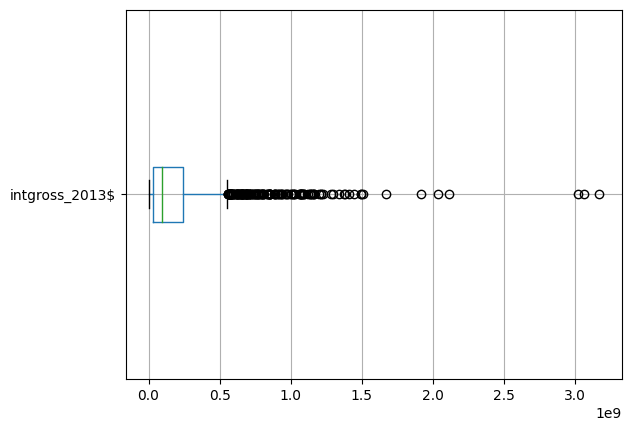

In [310]:
data.boxplot(column='intgross_2013$', vert=False)


In [359]:
new_q1 = data['intgross_2013$'].quantile(0.25)
new_q3 = data['intgross_2013$'].quantile(0.75)
new_iqr = new_q3 - new_q1

In [360]:
new_q1, new_q3, new_iqr

(23719671.75, 132470717.0, 108751045.25)

In [361]:
lower_limit = new_q1 - 1.5 * new_iqr
upper_limit = new_q3 + 1.5 * new_iqr
lower_limit, upper_limit

(-139406896.125, 295597284.875)

In [362]:
rows_to_remove = data.loc[(data['intgross_2013$'] > upper_limit) | (data['intgross_2013$'] < lower_limit)]
rows_to_remove

,year,imdb,title,test,clean_test,binary,budget,domgross,intgross,code,budget_2013$,domgross_2013$,intgross_2013$,period code,decade code
198,2011,tt1478338,bridesmaids,ok-disagree,ok,1,32500000,169106725,289263136,2011pass,33659951,175142277,299587165,1,1
419,2010,tt1243957,the tourist,nowomen,nowomen,0,100000000,67631157,278731369,2010fail,106823184,72245755,297749724,1,1
591,2008,tt1205489,gran torino,men-disagree,men,0,25000000,148095302,274543085,2008fail,27056408,160277075,297125986,2,2
595,2008,tt0962726,high school musical 3: senior year,ok,ok,1,11000000,90559416,274392880,2008pass,11904819,98008500,296963426,2,2
1007,2003,tt0322259,2 fast 2 furious,notalk,notalk,0,76000000,127120058,236220058,2003fail,96222609,160945047,299075134,3,2
1545,1994,tt0111070,the santa clause,notalk,notalk,0,22000000,144833357,189800000,1994fail,34576623,227629474,298301960,5,3


In [363]:
data.drop(rows_to_remove.index,inplace = True)

<Axes: ylabel='intgross_2013$'>

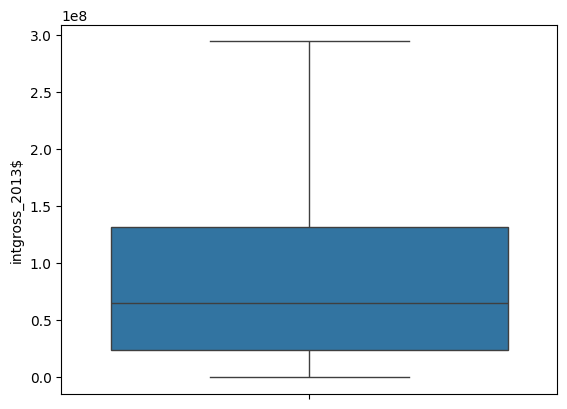

In [364]:
import seaborn as sns
sns.boxplot(data['intgross_2013$'])


<Axes: ylabel='budget'>

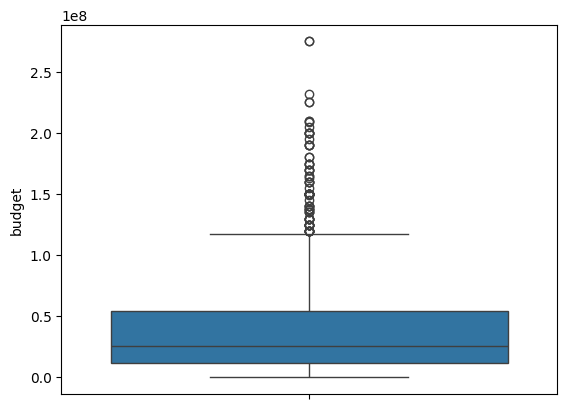

In [317]:
sns.boxplot(data['budget'])

In [329]:
new_q1 = data['budget'].quantile(0.25)
new_q3 = data['budget'].quantile(0.75)
new_iqr = new_q3 - new_q1

In [330]:
new_q1, new_q3, new_iqr

(10000000.0, 50000000.0, 40000000.0)

In [331]:
lower_limit = new_q1 - 1.5 * new_iqr
upper_limit = new_q3 + 1.5 * new_iqr
lower_limit, upper_limit

(-50000000.0, 110000000.0)

In [332]:
rows_to_remove = data.loc[(data['budget'] > upper_limit) | (data['budget'] < lower_limit)]
rows_to_remove

,year,imdb,title,test,clean_test,binary,budget,domgross,intgross,code,budget_2013$,domgross_2013$,intgross_2013$,period code,decade code
90,2013,tt1430132,the wolverine,ok,ok,1,115000000,132556852,416456852,2013pass,115000000,132556852,416456852,1,1
358,2010,tt1013743,knight and day,men-disagree,men,0,117000000,76423035,262142047,2010fail,124983125,81637519,280028482,1,1


In [333]:
data.drop(rows_to_remove.index,inplace = True)

<Axes: ylabel='budget'>

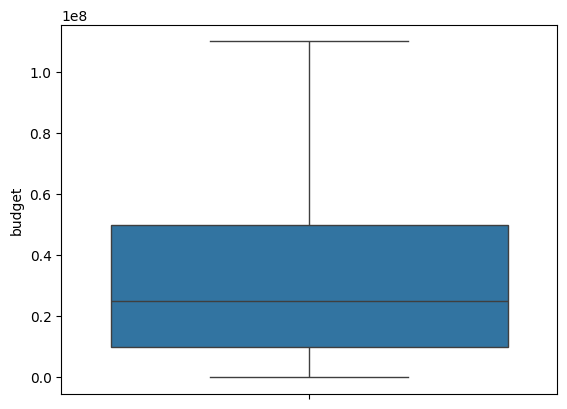

In [334]:
sns.boxplot(data['budget'])